# Diabetes Prediction
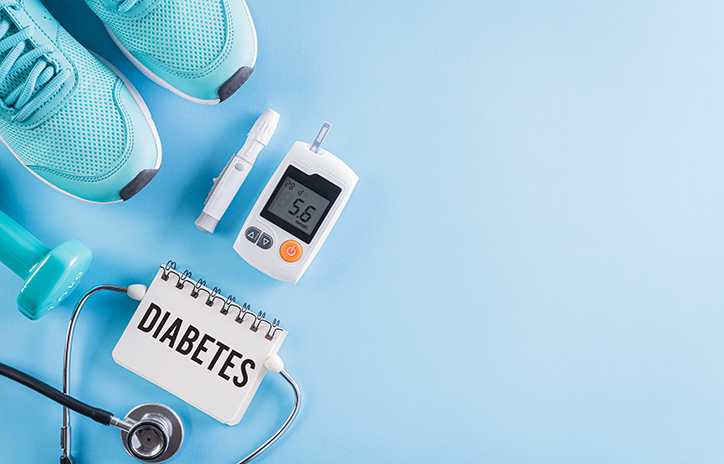

# 1. Introduction

What is Diabetes ? - According to CDC, Diabetes is a chronic (long-lasting) health condition that affects how your body turns food into energy. Your body breaks down most of the food you eat into sugar (glucose) and releases it into your bloodstream. When your blood sugar goes up, it signals your pancreas to release insulin. Insulin acts like a key to let the blood sugar into your body’s cells for use as energy. With diabetes, your body doesn’t make enough insulin or can’t use it as well as it should. When there isn’t enough insulin or cells stop responding to insulin, too much blood sugar stays in your bloodstream. Over time, that can cause serious health problems, such as heart disease, vision loss, and kidney disease.

reference: https://www.cdc.gov/diabetes/basics/diabetes.html

In the article "The Facts, Stats, and Impacts of Diabetes", ('https://www.cdc.gov/diabetes/library/spotlights/diabetes-facts-stats.html'), we can find that

"The year 2021 marked the 100th anniversary of the discovery of insulin. Before insulin was discovered, people with diabetes didn’t live long lives. Since then, we’ve come a long way in reducing the toll diabetes takes on people’s daily lives. But the fight isn’t over.

Today, the number of people with diabetes is higher than it has ever been. And it’s not just your grandparents you have to worry about. People are developing diabetes at younger ages and at higher rates. But the more you know about diabetes, the more you can do about preventing it, delaying it, or lessening its harmful effects."

![diabetes-stats-report-724px.png](attachment:dcc5b80e-b3b4-42ba-908d-fd8631f101ef.png)

So in this notebook, I tried to find what factors have impact to diabetes and how we can reduce them. In the data set, we can get some features.

* Pregnancies: To express the Number of pregnancies
* Glucose: To express the Glucose level in blood
* BloodPressure: To express the Blood pressure measurement
* SkinThickness: To express the thickness of the skin
* Insulin: To express the Insulin level in blood
* BMI: To express the Body mass index
* DiabetesPedigreeFunction: To express the Diabetes percentage
* Age: To express the age
* Outcome: To express the final result 1 is YES o is NO

# 2.1 Importing Packages

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler

from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import accuracy_score, log_loss

import warnings
warnings.filterwarnings("ignore")

# 2.2 Read Data

In [3]:
df=pd.read_csv('diabetes.csv')

# 2.3 Data Outline and Visualization

In [4]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


* Pieplot by oitcome

<AxesSubplot:ylabel='Outcome'>

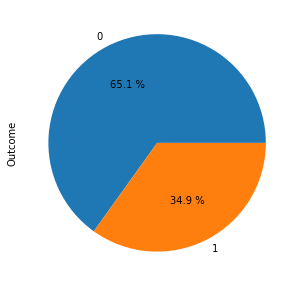

In [6]:
df.groupby('Outcome')['Outcome'].count().plot.pie(figsize=(5,5),autopct="%1.1f %%")

* Histplot by outcome

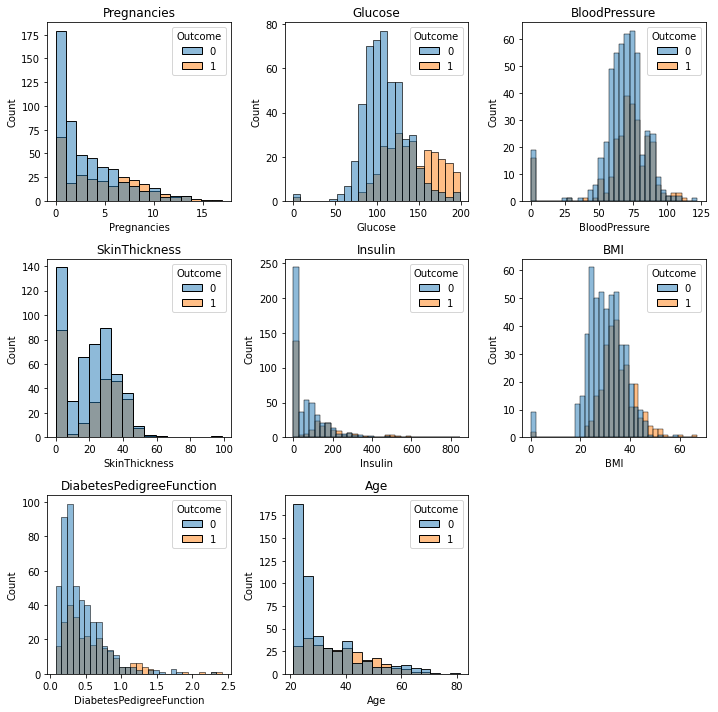

In [7]:
num_list=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']
fig = plt.figure(figsize=(10,10))

for i in range(len(num_list)):
    plt.subplot(3,3,i+1)
    plt.title(num_list[i])
    sns.histplot(data=df,x=df[num_list[i]],hue='Outcome')

plt.tight_layout()

We can find large distribution gap between outcome 0 and 1 in 'Glucose'.

* Boxplot by outcome

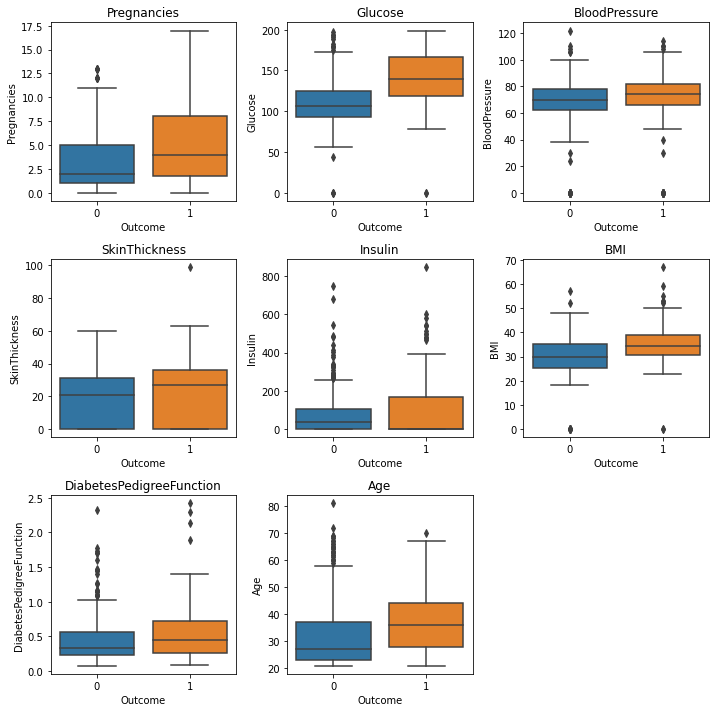

In [8]:
num_list=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']
fig = plt.figure(figsize=(10,10))

for i in range(len(num_list)):
    plt.subplot(3,3,i+1)
    plt.title(num_list[i])
    sns.boxplot(data=df,y=df[num_list[i]],x='Outcome')

plt.tight_layout()

We can find large gap between outcome 0 and 1 in 'Pregnancies', 'Glucose', 'Insulin', 'DiabetesPedigreeFunction' and  'Age'.

* Pairplot by outcome

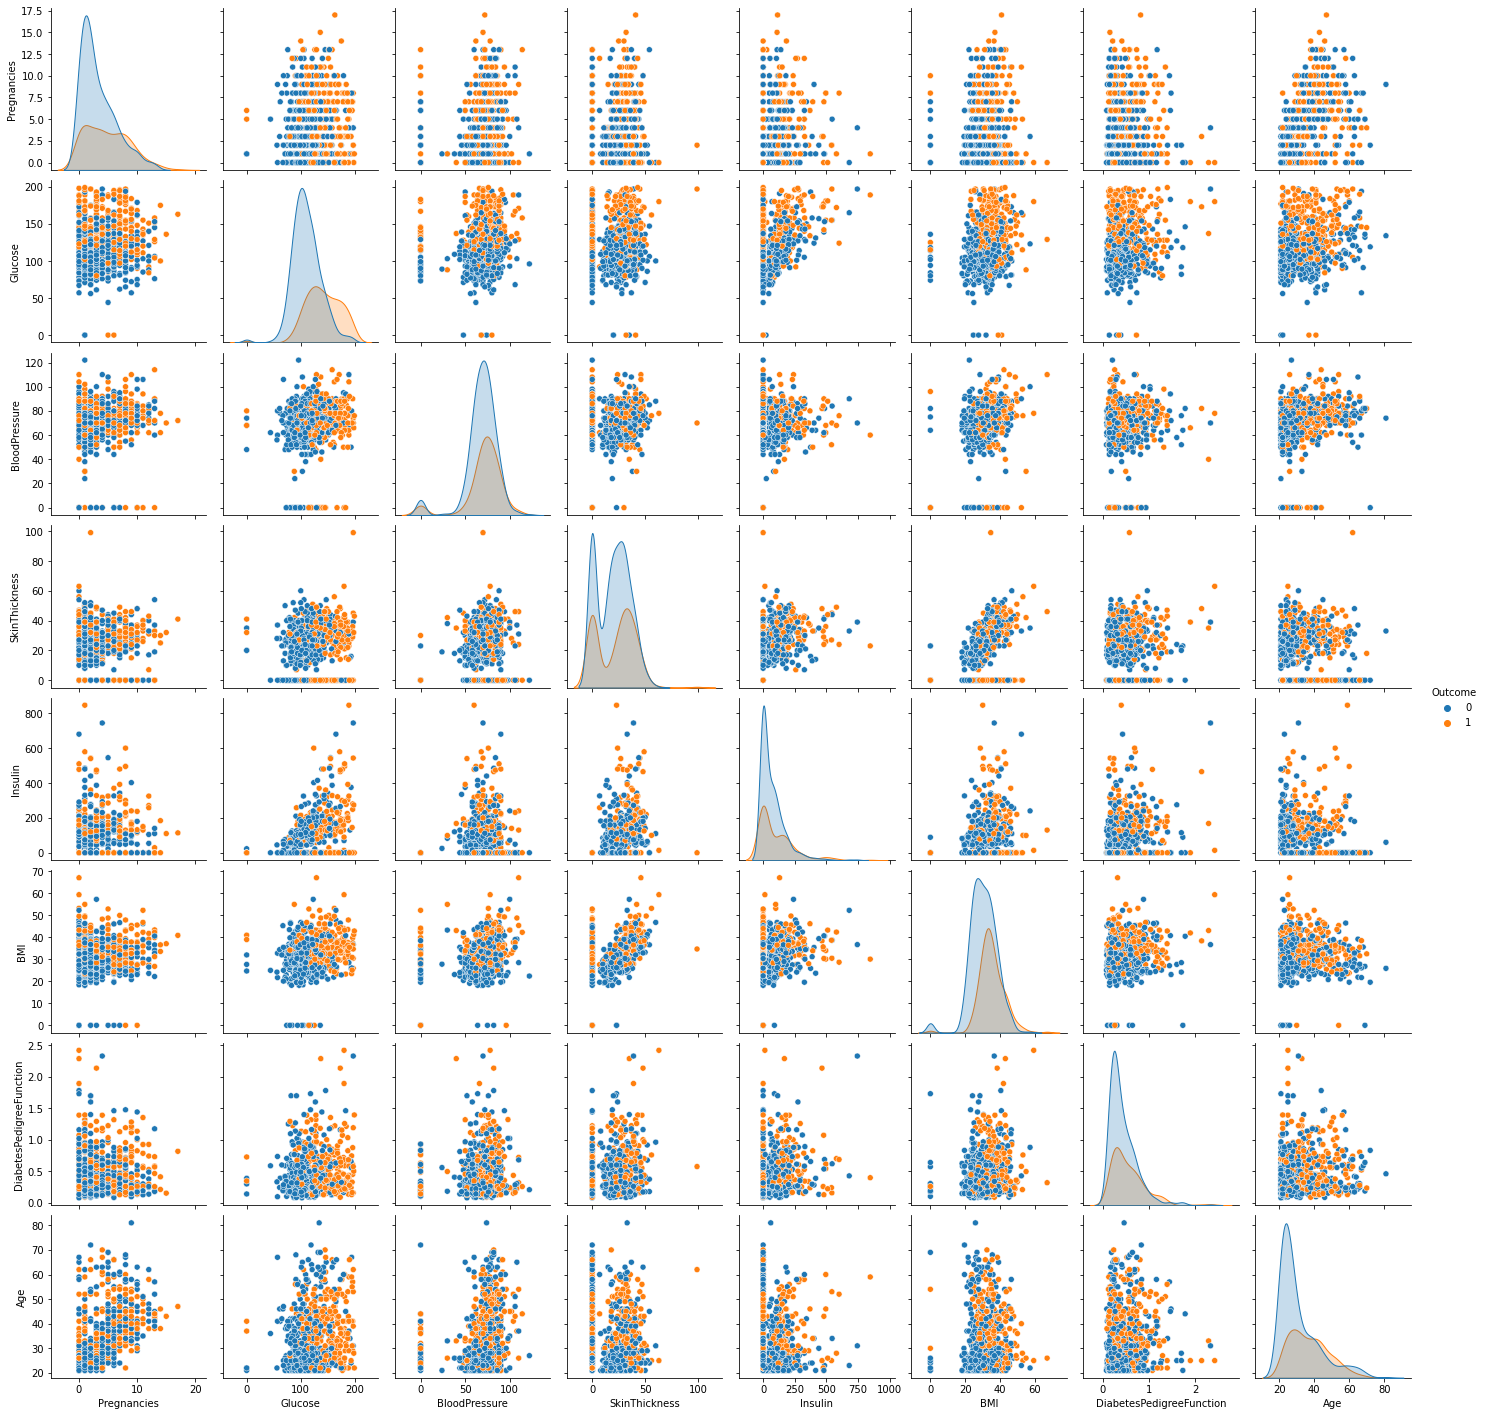

In [9]:
sns.pairplot(df,hue='Outcome')

We can find large distribution gap between outcome 0 and 1 in 'Glucose'.

* Correlation heatmap

<AxesSubplot:>

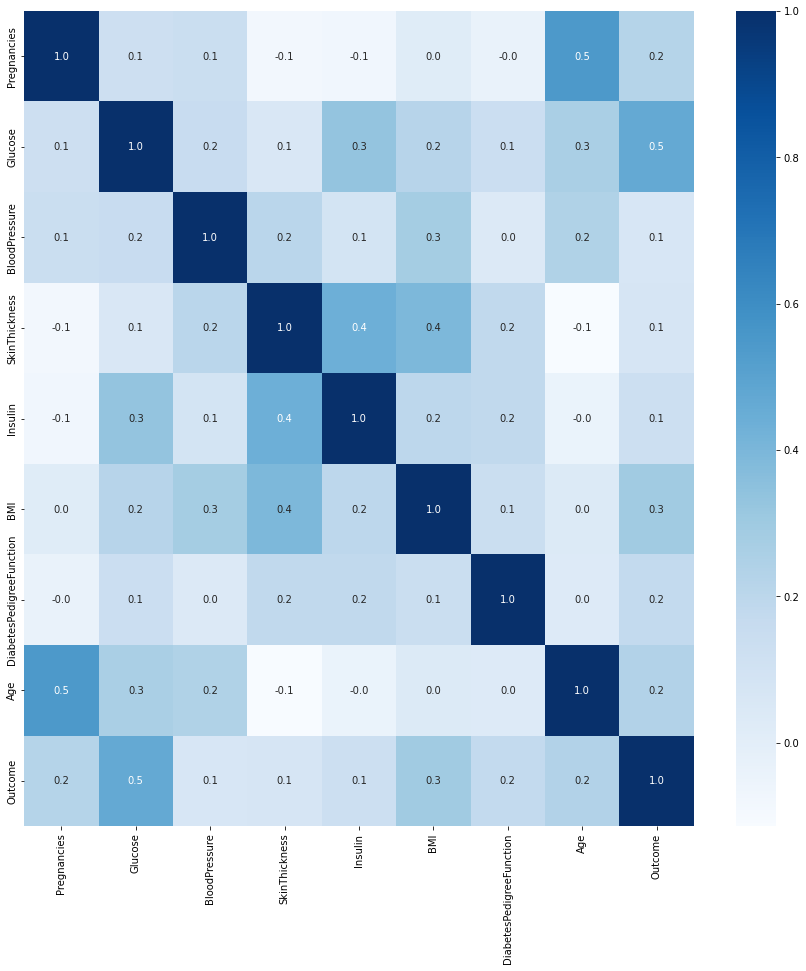

In [10]:
plt.figure(figsize = (15,15))
sns.heatmap(df.corr(),annot=True, cbar=True, cmap='Blues', fmt='.1f')

The strongest positive correlation is 'Glucose' and 'Outcome', 0.5. The next strongest positive correlation are 'SkinThickness' and 'Insulin', and 'SkinThickness' and 'BMI', 0.4.

# 3 Modeling

This time, We will compare, <br>
1. Nearest Neighbors <br>
2. Linear SVM <br>
3. RBF SVM <br>
4. Gaussian Process <br>
5. Decision Tree <br>
6. Random Forest <br>
7. Neural Net <br>
8. AdaBoost <br>
9. Naive Bayes <br>
10. QDA

In [11]:
X=df.drop(['Outcome'],axis=1)
y=df['Outcome']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [13]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [14]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

* Modeling

In [15]:
#code reference : https://www.kaggle.com/code/davidfumo/comparing-11-classification-models
names = [
    "Nearest Neighbors",
    "Linear SVM",
    "RBF SVM",
    "Gaussian Process",
    "Decision Tree",
    "Random Forest",
    "Neural Net",
    "AdaBoost",
    "Naive Bayes",
    "QDA",
]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.005,probability=True),
    SVC(gamma=2, C=0.005,probability=True),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis(),
]

* Comparing models

In [16]:
#code reference : https://www.kaggle.com/code/davidfumo/comparing-11-classification-models
log_cols=["Classifier", "Accuracy", "Log Loss"]
log = pd.DataFrame(columns=log_cols)

for clf in classifiers:
    clf.fit(X_train, y_train)
    name = clf.__class__.__name__
    
    print("="*30)
    print(name)
    
    print('****Results****')
    train_predictions = clf.predict(X_test)
    acc = accuracy_score(y_test, train_predictions)
    print("Accuracy: {:.4%}".format(acc))
    
    train_predictions = clf.predict_proba(X_test)
    ll = log_loss(y_test, train_predictions)
    print("Log Loss: {}".format(ll))
    
    log_entry = pd.DataFrame([[name, acc*100, ll]], columns=log_cols)
    log = log.append(log_entry)
    
print("="*30)

KNeighborsClassifier
****Results****
Accuracy: 70.7792%
Log Loss: 3.159860460728654
SVC
****Results****
Accuracy: 80.5195%
Log Loss: 0.49982888644464707
SVC
****Results****
Accuracy: 64.2857%
Log Loss: 0.6090790107790068
GaussianProcessClassifier
****Results****
Accuracy: 74.6753%
Log Loss: 0.49766624353198835
DecisionTreeClassifier
****Results****
Accuracy: 79.8701%
Log Loss: 1.3227122828286713
RandomForestClassifier
****Results****
Accuracy: 71.4286%
Log Loss: 0.5529097464396934
MLPClassifier
****Results****
Accuracy: 74.6753%
Log Loss: 0.5081072494906013
AdaBoostClassifier
****Results****
Accuracy: 73.3766%
Log Loss: 0.6759279259519924
GaussianNB
****Results****
Accuracy: 76.6234%
Log Loss: 0.5550920361810274
QuadraticDiscriminantAnalysis
****Results****
Accuracy: 77.9221%
Log Loss: 0.5839425991979827


# 4. Results

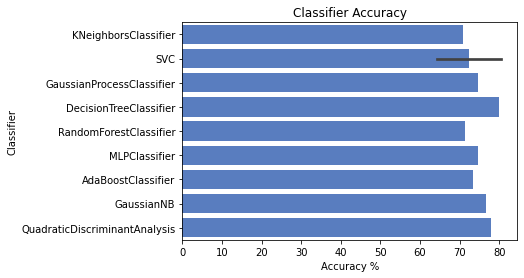

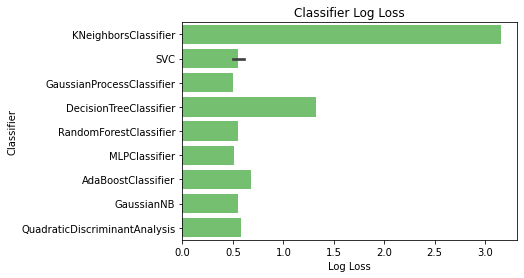

In [20]:
#code reference : https://www.kaggle.com/code/davidfumo/comparing-11-classification-models
sns.set_color_codes("muted")
sns.barplot(x='Accuracy', y='Classifier', data=log, color="b")

plt.xlabel('Accuracy %')
plt.title('Classifier Accuracy')
plt.show()

sns.set_color_codes("muted")
sns.barplot(x='Log Loss', y='Classifier', data=log, color="g")

plt.xlabel('Log Loss')
plt.title('Classifier Log Loss')
plt.show()

# 4.1 Features importance of linear SVM

In [18]:
clf = SVC(kernel="linear", C=0.005,probability=True)

# Fit with all the training set
clf.fit(X, y)

SVC(C=0.005, kernel='linear', probability=True)

<AxesSubplot:>

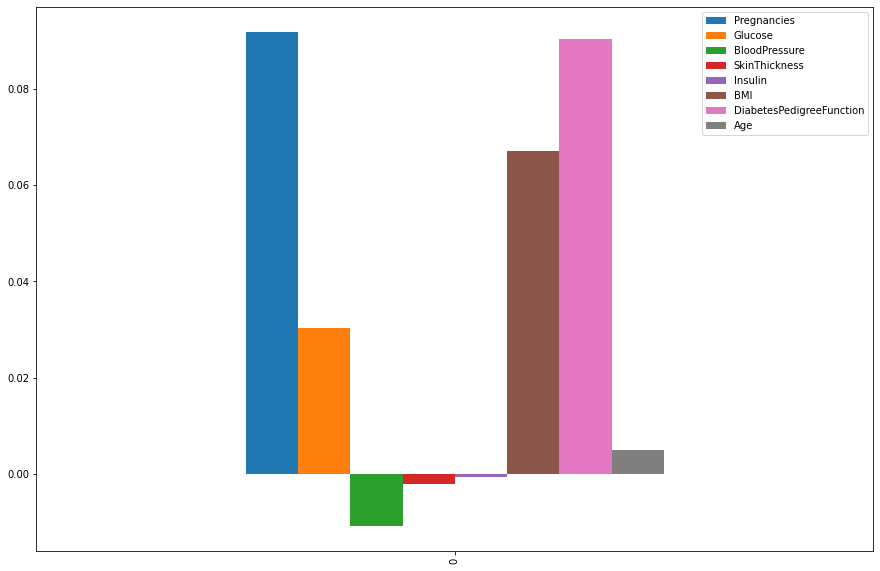

In [19]:
pd.DataFrame(clf.coef_,columns=X.columns).plot.bar(figsize=(15,10))

# 5. Discussion and Conclusion

The most important feature is 'Pregnancies'. The next one is 'DiabetesPedigreeFunction' and the third one is 'BMI'.

# Features Importance Analysis

# 1.Diabetes and Pregnancy

According to NHS (https://www.nhs.uk/conditions/gestational-diabetes/),

"Gestational diabetes is high blood sugar (glucose) that develops during pregnancy and usually disappears after giving birth. It can happen at any stage of pregnancy, but is more common in the second or third trimester. It happens when your body cannot produce enough insulin – a hormone that helps control blood sugar levels – to meet your extra needs in pregnancy. Gestational diabetes can cause problems for you and your baby during pregnancy and after birth. But the risks can be reduced if the condition is detected early and well managed.

Any woman can develop gestational diabetes during pregnancy, but you're at an increased risk if:

* your body mass index (BMI) is above 30 – use the BMI healthy weight calculator to work out your BMI
* you previously had a baby who weighed 4.5kg (10lb) or more at birth
* you had gestational diabetes in a previous pregnancy
* 1 of your parents or siblings has diabetes
* you are of south Asian, Black, African-Caribbean or Middle Eastern origin (even if you were born in the UK)

If any of these apply to you, you should be offered screening for gestational diabetes during your pregnancy."


# 2.Diabetes and Family Health History

According to CDC ('https://www.cdc.gov/genomics/famhistory/famhist_diabetes.htm')

"If you have a family health history of diabetes, you are more likely to have prediabetes and develop diabetes. You are also more likely to get type 2 diabetes if you have had gestational diabetes, are overweight or obese, or are African American, American Indian, Asian American, Pacific Islander, or Hispanic. Learning about your family health history of diabetes is an important step in finding out if you have prediabetes and knowing if you are more likely to get diabetes. You can use the Surgeon General’s family health history tool, My Family Health Portrait, to collect your family health history of diabetes and find out your risk of getting diabetes. Be sure to let your doctor know about your family health history of diabetes, especially if you have a mother, father, sister, or brother with diabetes. Your doctor might recommend that you have screening for diabetes earlier."


# 3.Diabetes and BMI

According to CDC ('https://www.cdc.gov/diabetes/managing/healthy-weight.html')

"BMI measures your height compared to your weight. For example, a person who is 5’7” and weighs 170 pounds has a BMI of 26.6, which is in the overweight range. But experts note that BMI doesn’t measure belly fat, and that’s important. Too much belly fat can increase your risk for type 2 diabetes, heart disease, and stroke. Waist circumference (waist size) takes belly fat into account and helps predict your risk of health problems from being overweight. Women whose waist measures more than 35 inches and men whose waist measures more than 40 inches are at higher risk. Losing weight can reduce belly fat and lower that risk!"

Thank you !